# ***SIMPLE LINEAR REGRESSION PERFORMANCE ON THE HOUSING PRICE ANALYSIS*** 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_excel("Linear Regression.xlsx")

In [52]:
data.head(3)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0


In [53]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

### #This tells the type of all the features.

In [54]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


## #This gives the statistical calculation .

# EDA PART

In [55]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


## #here we can see the correlation value of all the features btw each other .

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D803708288>,
      dtype=object)

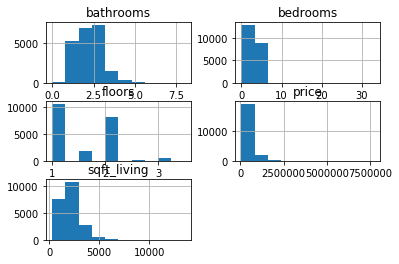

In [56]:
data.hist()

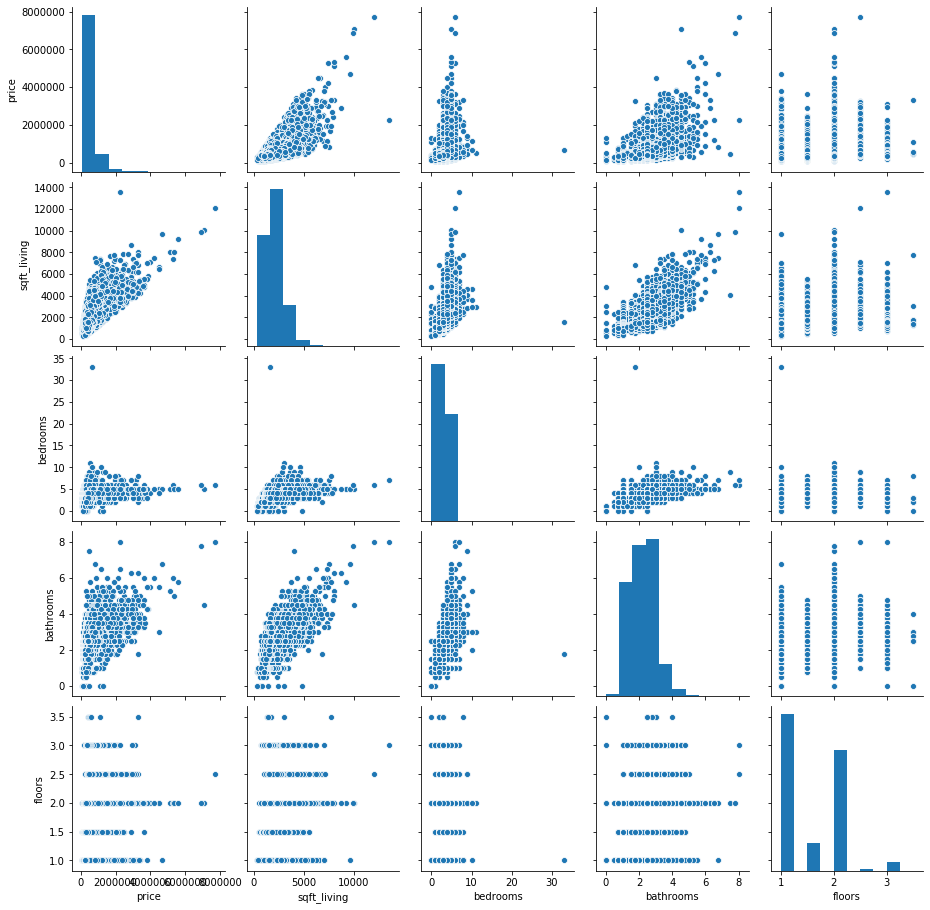

In [57]:
sns.pairplot(data)

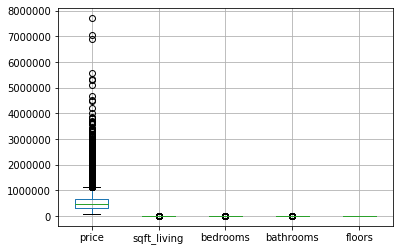

In [58]:
data.boxplot()

## #with the help of box plot, we can see that attribute "price" have lot of outliers and rest all of the feature rarely have any outlier .

In [59]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


# 1. MODEL 1(Price and sqft_living)

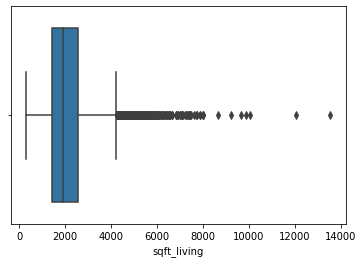

In [60]:
sns.boxplot(data['sqft_living'])

## #having lot of outliers in tge sqft_living feature .

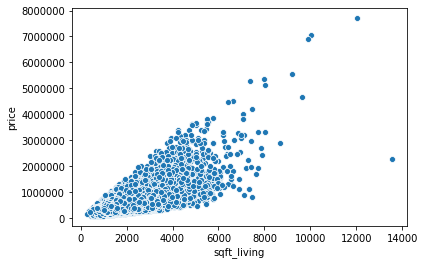

In [61]:
sns.scatterplot(data['sqft_living'],data['price'])

## #as we can see the graph is upward,hence can say there is positive correlation btw them .

In [62]:
x=data.iloc[:,:1]

## #here we have assign the value of x (as price)

In [63]:
x.head(1)

,price
0,221900


In [64]:
y1=data.iloc[:,1:2]

In [65]:
y1.head(1)

,sqft_living
0,1180



## #here we have assign the value of y (as sqft_living)

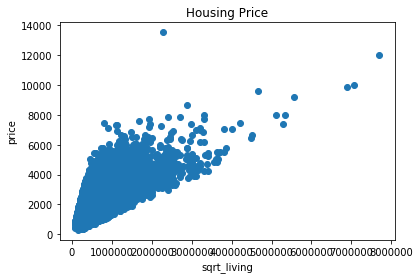

In [66]:
# Visualise dataset
plt.scatter(x, y1)
plt.title('Housing Price')
plt.xlabel('sqrt_living')
plt.ylabel('price')
plt.show()

# Spliting the data for training and testing

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y1,test_size = 0.3,random_state = 2)

In [68]:
X_train.shape #shape of the x for training

(15129, 1)

In [69]:
X_test.shape #shape of the x for testing

(6484, 1)

In [70]:
y_train.shape #shape of the y1 for training

(15129, 1)

In [71]:
y_test.shape #shape of the y1 for testing

(6484, 1)

# BUILDING MODEL

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg1=LinearRegression()

In [73]:
#TRAIN THE MODEL

lin_reg1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print("The value of coefficient is.....",lin_reg1.coef_)
print("The value of intercept is......",lin_reg1.intercept_)

The value of coefficient is..... [[0.00175561]]
The value of intercept is...... [1126.33275865]


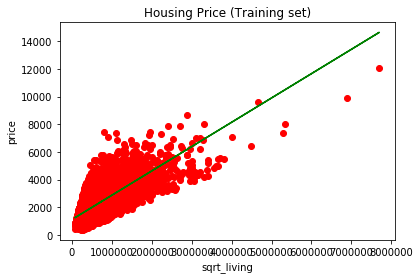

In [75]:
#Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg1.predict(X_train), color = 'green')
plt.title('Housing Price (Training set)')
plt.xlabel('sqrt_living')
plt.ylabel('price')
plt.show()


In [76]:
#test the model

ypred1=lin_reg1.predict(X_test)
ypred1

array([[2416.70253512],
       [3145.27866741],
       [1741.67235954],
       ...,
       [1719.72729531],
       [1824.18580103],
       [2846.82579394]])

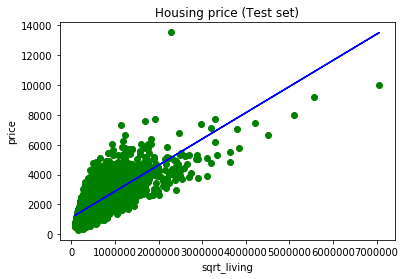

In [77]:
# Visualise Test set result

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg1.predict(X_test), color = 'blue')
plt.title('Housing price (Test set)')
plt.xlabel('sqrt_living')
plt.ylabel('price')
plt.show()


In [78]:
#estimating the error

from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred1))
r_square=r2_score(y_test,ypred1)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.4952101890160381
The RMSE value is........ 662.299619161394


## #As the value of r-square is 49.52101, this means the performance is around 50% of the dataset 

## #error in the table value and predicted value is 662.299




# 2. MODEL 2(Price and bedrooms)

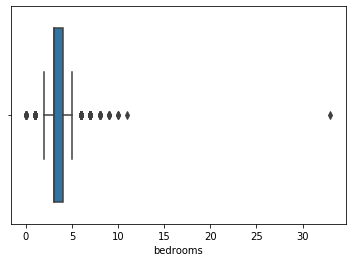

In [79]:
sns.boxplot(data['bedrooms'])

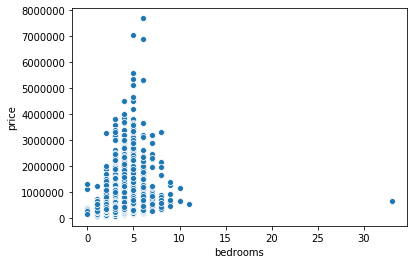

In [80]:
sns.scatterplot(data['bedrooms'],data['price'])

## #we can see that both have least correlated with each other .

In [81]:
x=data.iloc[:,:1]
x.head(1)

,price
0,221900


## #assigning the value of x (as price)

In [82]:
y2 = data.iloc[:,2:3]
y2.head(1)

,bedrooms
0,3


## #assigning the value of y(as bedrooms)

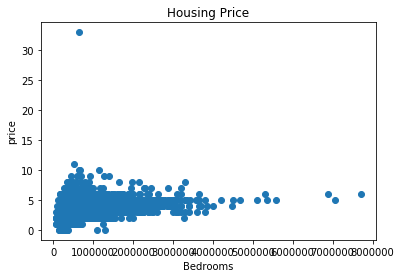

In [83]:
# Visualise dataset
plt.scatter(x, y2)
plt.title('Housing Price')
plt.xlabel('Bedrooms')
plt.ylabel('price')
plt.show()

# Spliting the data for training and testing

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y2,test_size = 0.2,random_state = 2)

In [85]:
X_train.shape #shape of the x for training

(17290, 1)

In [86]:
X_test.shape #shape of the x for testing

(4323, 1)

# BUILDING MODEL

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg2=LinearRegression()

In [88]:
#train the model

lin_reg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
print("The value of coefficient is.....",lin_reg2.coef_)
print("The value of intercept is......",lin_reg2.intercept_)

The value of coefficient is..... [[7.70125623e-07]]
The value of intercept is...... [2.95061418]


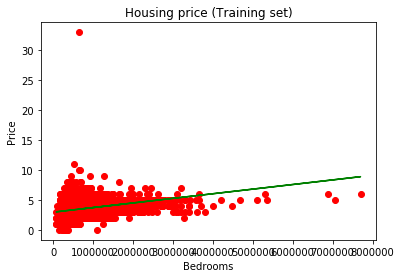

In [90]:
#Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg2.predict(X_train), color = 'green')
plt.title('Housing price (Training set)')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


In [91]:
#test the model

ypred2=lin_reg2.predict(X_test)
ypred2

array([[3.51665652],
       [3.83625865],
       [3.22054321],
       ...,
       [3.25670061],
       [3.23941129],
       [3.11080031]])

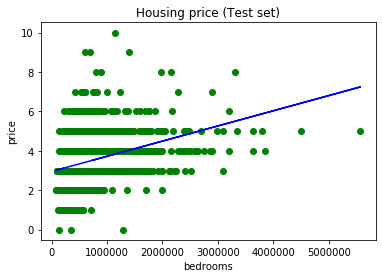

In [92]:
# Visualise Test set result

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg2.predict(X_test), color = 'blue')
plt.title('Housing price (Test set)')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()


In [93]:
#estimating the error

from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred2))
r_square=r2_score(y_test,ypred2)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.10933217805863649
The RMSE value is........ 0.8736548931683022


## #as we can see that the r square value is 0.1093,which means the performance of the model is only 11%,which can directly tells that this is a bad performing model .

In [94]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


# 3. Model 3(price and bathrooms)

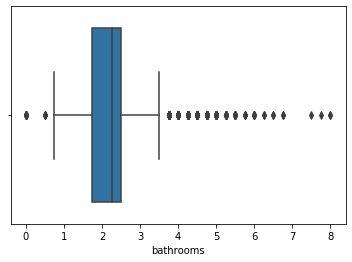

In [95]:
sns.boxplot(data['bathrooms'])

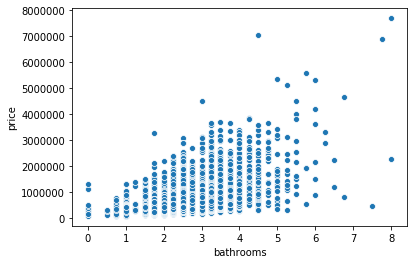

In [96]:
sns.scatterplot(data['bathrooms'],data['price'])

## #we can see that the graph is much scattered, mean it is also least correlated with each other .

In [97]:
x=data.iloc[:,:1]
x.head(1)

,price
0,221900


In [98]:
y3=data.iloc[:,3:4]
y3.head(1)

,bathrooms
0,1.0


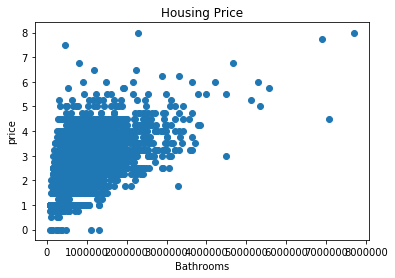

In [99]:
# Visualise dataset
plt.scatter(x, y3)
plt.title('Housing Price')
plt.xlabel('Bathrooms')
plt.ylabel('price')
plt.show()

## #this graph is somewhat upward n scattered,so can assume that is also have the least correlation with each other .

In [100]:
# Split the records for training & testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y3,test_size = 0.3,random_state = 2)

In [101]:
X_train.shape   #shape of the x for training

(15129, 1)

In [102]:
X_test.shape   #shape of the x for testing

(6484, 1)

In [103]:
# Model Building with sklearn

from sklearn.linear_model import LinearRegression
lin_reg3=LinearRegression()

In [104]:
#train the model

lin_reg3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
print("The value of coefficient is.....",lin_reg3.coef_)
print("The value of intercept is......",lin_reg3.intercept_)

The value of coefficient is..... [[1.11076561e-06]]
The value of intercept is...... [1.51460286]


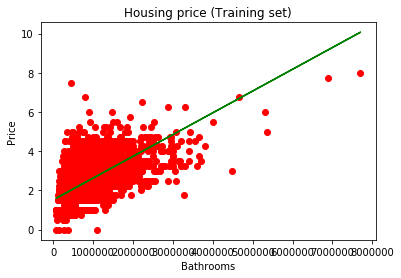

In [106]:
#Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg3.predict(X_train), color = 'green')
plt.title('Housing price (Training set)')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [107]:
#test the model

ypred3=lin_reg3.predict(X_test)
ypred3

array([[2.33101558],
       [2.79198331],
       [1.9039262 ],
       ...,
       [1.89004163],
       [1.95613219],
       [2.60315315]])

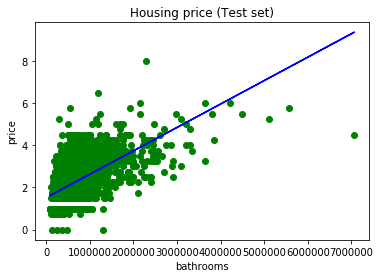

In [108]:
# Visualise Test set result

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg3.predict(X_test), color = 'blue')
plt.title('Housing price (Test set)')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()


In [109]:
#estimating the error

from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred3))
r_square=r2_score(y_test,ypred3)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.2728582812424519
The RMSE value is........ 0.6586639736151974


## #as we can see the value of r square is 0.2828,which means tha performance of the model is just 27%,which is not a good performance model . 

# 4. MODEL 4(Price and floors)

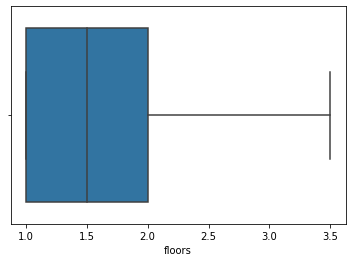

In [110]:
sns.boxplot(data['floors'])

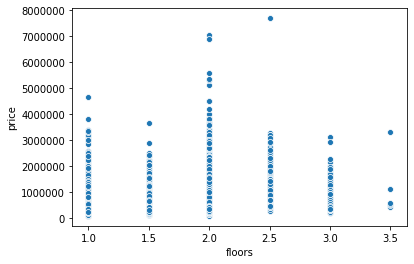

In [111]:
sns.scatterplot(data['floors'],data['price'])

In [112]:
x=data.iloc[:,:1]
x.head(1)

,price
0,221900


In [113]:
y4=data.iloc[:,4:]
y4.head(1)

,floors
0,1.0


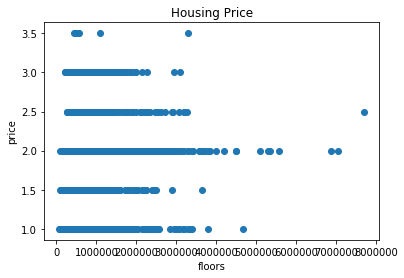

In [114]:
# Visualise dataset
plt.scatter(x, y4)
plt.title('Housing Price')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

In [115]:
# Split the records for training & testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y4,test_size = 0.3,random_state = 2)

In [116]:
X_train.shape   #shape of the x for training

(15129, 1)

In [117]:
X_test.shape   #shape of the x for testing

(6484, 1)

In [118]:
# Model Building with sklearn

from sklearn.linear_model import LinearRegression
lin_reg4=LinearRegression()

In [119]:
#train the model

lin_reg4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
print("The value of coefficient is.....",lin_reg4.coef_)
print("The value of intercept is......",lin_reg4.intercept_)

The value of coefficient is..... [[3.7577337e-07]]
The value of intercept is...... [1.29283509]


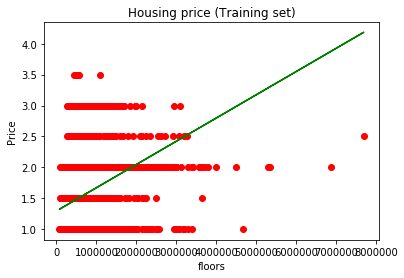

In [121]:
#Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg4.predict(X_train), color = 'green')
plt.title('Housing price (Training set)')
plt.xlabel('floors')
plt.ylabel('Price')
plt.show()

In [122]:
#test the model

ypred4=lin_reg4.predict(X_test)
ypred4

array([[1.56902852],
       [1.72497447],
       [1.42454366],
       ...,
       [1.41984649],
       [1.44220501],
       [1.66109299]])

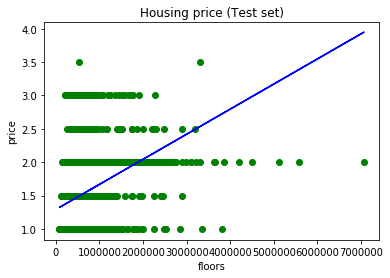

In [123]:
# Visualise Test set result

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg4.predict(X_test), color = 'blue')
plt.title('Housing price (Test set)')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

In [124]:
#estimating the error

from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred4))
r_square=r2_score(y_test,ypred4)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.06889559040859172
The RMSE value is........ 0.523693442382003


## #as we can see the value of r square is 0.06889,which means tha performance of the model is just 6%,which is not a good performance model . 

# **So from all the above 4 models,the highest R-square value is 50%,hence the accuracy of the model is 50%**